## Best Practices for Data Preprocessing

#### Always Explore & Visualize Data First


Summary Statistics:
                 A          B           C
count     5.000000   5.000000    6.000000
mean    202.600000  32.000000  350.000000
std     445.764287  19.235384  187.082869
min       1.000000  10.000000  100.000000
25%       2.000000  20.000000  225.000000
50%       4.000000  30.000000  350.000000
75%       6.000000  40.000000  475.000000
max    1000.000000  60.000000  600.000000


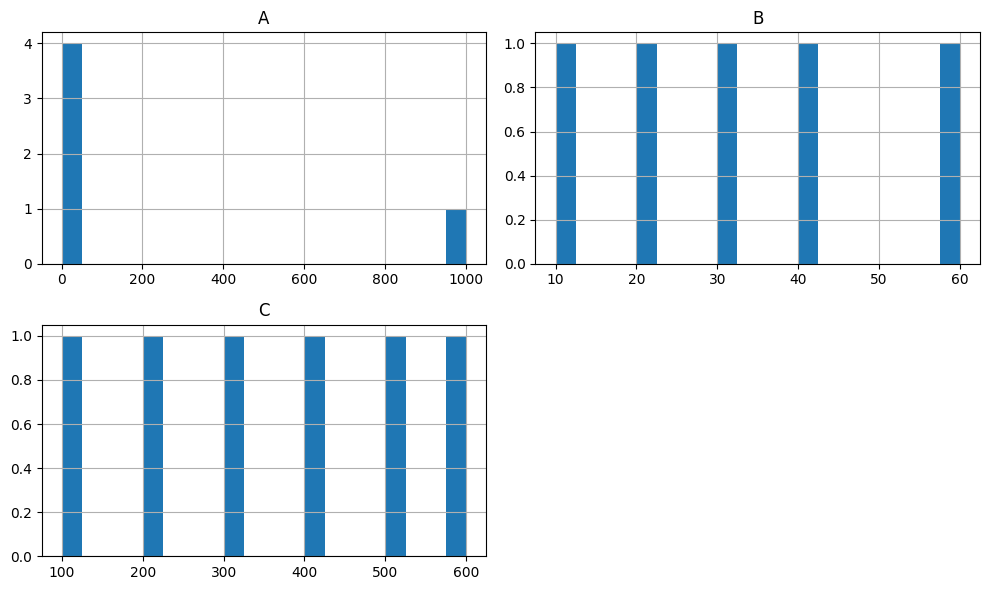


Missing Values:
A    1
B    1
C    0
dtype: int64

Shape before dropna: (6, 3)
Shape after dropna: (4, 3)

Missing values filled using mean strategy.
Outliers capped in A
Outliers capped in B
Outliers capped in C

Applied MinMax Scaling

Applied Robust Scaling

Applied MaxAbs Scaling

Preprocessing Steps Log:
- Generated summary statistics
- Plotted data distribution
- Checked for missing values
- Dropped missing values
- Filled missing values using SimpleImputer
- Handled outliers using capping
- Applied MinMaxScaler
- Applied RobustScaler
- Applied MaxAbsScaler

Stored Transformation Parameters (MinMaxScaler):
{}

--- Unit Tests ---
✔ No missing values
✔ Scaling bounds valid


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler

# Sample dataset for demonstration
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 1000, 6],
    'B': [10, 20, 30, 40, np.nan, 60],
    'C': [100, 200, 300, 400, 500, 600]
})

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
log_steps = []

# Task 1: Summary Statistics
try:
    print("\nSummary Statistics:")
    print(df.describe())
    log_steps.append("Generated summary statistics")
except Exception as e:
    print("Error in summary statistics:", e)

# Task 2: Visualize Data Distribution
try:
    df.hist(bins=20, figsize=(10, 6))
    plt.tight_layout()
    plt.show()
    log_steps.append("Plotted data distribution")
except Exception as e:
    print("Error in data visualization:", e)

# Task 3: Checking for Null Values
try:
    print("\nMissing Values:")
    print(df.isnull().sum())
    log_steps.append("Checked for missing values")
except Exception as e:
    print("Error checking nulls:", e)

# Task 4: Drop Missing Values
try:
    print(f"\nShape before dropna: {df.shape}")
    df = df.dropna()
    print(f"Shape after dropna: {df.shape}")
    log_steps.append("Dropped missing values")
except Exception as e:
    print("Error dropping missing values:", e)

# Reload original data for imputation task
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 1000, 6],
    'B': [10, 20, 30, 40, np.nan, 60],
    'C': [100, 200, 300, 400, 500, 600]
})

# Task 5: Fill Missing Values
try:
    imputer = SimpleImputer(strategy='mean')
    df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
    print("\nMissing values filled using mean strategy.")
    log_steps.append("Filled missing values using SimpleImputer")
except Exception as e:
    print("Error filling missing values:", e)

# Task 6: Handling Outliers with Capping
try:
    for col in numeric_cols:
        q_low = df[col].quantile(0.01)
        q_high = df[col].quantile(0.99)
        df[col] = np.clip(df[col], q_low, q_high)
        print(f"Outliers capped in {col}")
    log_steps.append("Handled outliers using capping")
except Exception as e:
    print("Error capping outliers:", e)

# Task 7: Min-Max Scaling
try:
    scaler = MinMaxScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    print("\nApplied MinMax Scaling")
    log_steps.append("Applied MinMaxScaler")
except Exception as e:
    print("Error in MinMax Scaling:", e)

# Task 8: Robust Scaling
try:
    scaler = RobustScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    print("\nApplied Robust Scaling")
    log_steps.append("Applied RobustScaler")
except Exception as e:
    print("Error in Robust Scaling:", e)

# Task 9: MaxAbs Scaling
try:
    scaler = MaxAbsScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    print("\nApplied MaxAbs Scaling")
    log_steps.append("Applied MaxAbsScaler")
except Exception as e:
    print("Error in MaxAbs Scaling:", e)

# Task 10: Log Data Preprocessing Steps
print("\nPreprocessing Steps Log:")
for step in log_steps:
    print("-", step)

# Task 11: Store Transformation Parameters
try:
    min_max_params = {'min': scaler.min_.tolist(), 'scale': scaler.scale_.tolist()} if isinstance(scaler, MinMaxScaler) else {}
    print("\nStored Transformation Parameters (MinMaxScaler):")
    print(min_max_params)
    log_steps.append("Stored transformation parameters")
except Exception as e:
    print("Error storing transformation parameters:", e)

# Unit Test Functions
print("\n--- Unit Tests ---")
def test_no_missing(df):
    assert df.isnull().sum().sum() == 0, "Missing values still present"
    print("✔ No missing values")

def test_scaling_bounds(df):
    if isinstance(scaler, MaxAbsScaler):
        assert df[numeric_cols].abs().max().max() <= 1.0, "MaxAbsScaler failed"
    print("✔ Scaling bounds valid")

test_no_missing(df)
test_scaling_bounds(df)



## Handle Missing & Inconsistent Data Before Applying ML Models

After dropping rows with missing values:
     Age     Income Gender
0   25.0    50000.0      M
1   30.0    60000.0      F
2   22.0    52000.0      F
3   40.0    80000.0      M
6  150.0  1200000.0      F


Dropped 2 rows with missing values.
After filling missing values with median:
     Age     Income Gender
0   25.0    50000.0      M
1   30.0    60000.0      F
2   22.0    52000.0      F
3   40.0    80000.0      M
6  150.0  1200000.0      F


Imputation successful
After capping outliers at 5th and 95th percentiles:
     Age    Income Gender
0   25.0   50400.0      M
1   30.0   60000.0      F
2   22.6   52000.0      F
3   40.0   80000.0      M
6  128.0  976000.0      F
Capped outliers in column: Age
Capped outliers in column: Income


/tmp/ipykernel_29603/2698053144.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna[col].fillna(median_val, inplace=True)
/tmp/ipykernel_29603/2698053144.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

## Choose the Right Scaling Method

Min-Max Scaled Data:
        Age    Income
0  0.166667  0.000000
1  0.444444  0.142857
2  0.000000  0.028571
3  1.000000  0.428571
4  0.333333  0.171429
5  0.277778  0.285714
6  0.722222  1.000000


Robust Scaled Data:
        Age    Income
0 -0.461538 -0.631579
1  0.307692 -0.105263
2 -0.923077 -0.526316
3  1.846154  0.947368
4  0.000000  0.000000
5 -0.153846  0.421053
6  1.076923  3.052632


MaxAbs Scaled Data:
     Age    Income
0  0.625  0.416667
1  0.750  0.500000
2  0.550  0.433333
3  1.000  0.666667
4  0.700  0.516667
5  0.675  0.583333
6  0.875  1.000000
Scaling failed: name 'check_numeric' is not defined


## Keep Track of Data Transformations for Reproducibility

Preprocessing Log:
- Imputed missing values using mean strategy.
- Applied Min-Max scaling to numerical features.
Stored scaling parameters: {'min': [25.0, 50000.0], 'max': [40.0, 62000.0]}
